# Frequent nouns WE

This notebook uses frequency sorting by the frequency of lemmas.

In [1]:
import pandas as pd
import numpy as np

We extracted a list of most frequently used nouns and we can merge them with the WE of FlauBERT.

In [2]:
top_freq_n = pd.read_csv('Most Frequent Words/top_frequent_NOUN.csv', index_col='Word')[:1000]

In [3]:
top_freq_n

,lemme,cgram,genre,nombre,freqlemlivres
Word,,,,,
homme,homme,NOM,m,s,1398.85
hommes,homme,NOM,m,p,1398.85
jour,jour,NOM,m,s,1341.76
jours,jour,NOM,m,p,1341.76
temps,temps,NOM,m,s,1289.39
...,...,...,...,...,...
cesses,cesse,NOM,f,p,71.96
flamme,flamme,NOM,f,s,71.82
flammes,flamme,NOM,f,p,71.82


In [4]:
all_n_we = pd.read_csv('all_nouns_we.csv', index_col=0)

Out of 1000 most popular nouns, 899 have their own embedding. We can merge them into one DataFrame.

In [5]:
freq_n_we = all_n_we.merge(top_freq_n, left_index=True, right_index=True)
freq_n_we

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,gn,gender,lemme,cgram,genre,nombre,freqlemlivres
absence,3.322297,-0.768149,3.555035,-0.685460,1.201102,-3.151831,-3.592423,1.189369,-2.742928,-2.666739,...,-1.852207,5.123568,-2.381779,singular,feminine,absence,NOM,f,s,76.28
absences,3.295355,-0.794079,2.472845,3.223941,5.035848,-4.848855,-4.557629,-2.719433,-1.932022,-6.440993,...,-1.545623,5.919082,0.577700,plural,feminine,absence,NOM,f,p,76.28
accord,-0.732188,-2.024965,1.674970,-4.194049,-2.528312,-2.400746,-4.672920,0.374903,6.015941,-0.066068,...,-2.688764,-5.424189,-6.660925,singular,masculine,accord,NOM,m,s,136.15
accords,1.037610,-0.246123,3.333316,-4.094496,0.056898,-2.978131,-4.198946,-2.159259,3.082677,2.101236,...,-3.825052,-5.254343,-6.959417,plural,masculine,accord,NOM,m,p,136.15
action,1.376720,-3.602622,0.270682,-7.004842,1.199668,-0.341319,3.974475,-0.292309,2.597899,1.607074,...,-0.797240,3.015040,0.167511,singular,feminine,action,NOM,f,s,87.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
événements,-1.245101,-0.820061,1.330310,5.786696,3.966537,-3.242018,-0.265572,2.159446,0.661078,-0.936386,...,-6.080573,1.265242,1.124227,plural,masculine,événement,NOM,m,p,84.59
être,0.166950,-1.121742,3.855680,0.846314,-3.065409,0.577782,1.696410,0.962429,1.131322,-5.577701,...,-5.050613,1.669239,-4.337866,singular,masculine,être,NOM,m,s,122.57
êtres,3.589590,-4.551544,6.088149,2.847501,3.829500,-3.342109,2.749030,-0.169812,1.994654,0.893699,...,-1.911428,0.167977,-1.285041,plural,masculine,être,NOM,m,p,122.57
île,-0.489183,-3.752668,-2.676017,4.677486,1.093927,-5.670148,-0.456426,2.867334,2.531248,-2.738322,...,-7.543975,-2.131077,-4.665631,singular,feminine,île,NOM,f,s,108.24


We can also create a dataframe with WE of all available nouns and their frequencies, having approximately 11K nouns WE available:

In [6]:
all_nouns_with_freq = pd.read_csv('Most Frequent Words/top_frequent_NOUN.csv', index_col='Word')
all_n_we_with_freq = all_n_we.merge(all_nouns_with_freq, left_index=True, right_index=True).sort_values(by='freqlemlivres', ascending=False)
all_n_we_with_freq

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,gn,gender,lemme,cgram,genre,nombre,freqlemlivres
hommes,4.326858,-3.221477,0.375476,1.080854,2.554502,-5.656284,-0.324822,0.469529,1.344191,6.030049,...,-1.560391,-3.326882,-0.675115,plural,masculine,homme,NOM,m,p,1398.85
homme,0.982068,-2.150918,3.292666,-1.743230,0.413894,-5.987411,0.566339,3.455711,2.001335,6.166493,...,-0.126107,0.730464,-2.029576,singular,masculine,homme,NOM,m,s,1398.85
jours,-0.026998,-2.795911,-2.721360,3.597634,6.496082,-3.828993,2.414525,0.934600,1.214119,-3.398823,...,-3.202814,2.076404,0.418483,plural,masculine,jour,NOM,m,p,1341.76
jour,-2.987382,-2.454106,-1.728866,0.308665,1.274498,-2.007676,0.702684,2.375990,-1.239367,0.244998,...,-1.921343,-0.045948,0.564262,singular,masculine,jour,NOM,m,s,1341.76
oeil,3.260280,1.576548,-1.429666,-3.525702,-3.073474,-4.477215,-0.118728,2.799263,1.249392,-1.530996,...,-5.237140,10.978527,0.377133,singular,masculine,oeil,NOM,m,s,1234.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
panel,3.742805,-0.549520,1.189031,8.067177,-1.727568,-2.120897,-1.554837,1.518477,-4.383075,3.947877,...,-0.692195,-1.430261,-1.182876,singular,masculine,panel,NOM,m,s,0.00
convertisseur,5.421240,-6.260304,1.083069,-2.974193,-2.253003,0.696564,0.405815,0.890551,5.358188,7.002011,...,-5.389167,4.250682,-1.990458,singular,masculine,convertisseur,NOM,m,s,0.00
contributeur,2.572418,-5.129032,-0.636941,3.248966,5.709259,0.412242,3.720769,-0.525802,3.804229,-3.126579,...,-4.213766,5.318457,-4.549295,singular,masculine,contributeur,NOM,m,s,0.00
pat,6.369482,-3.639431,-2.073435,1.820127,1.801914,0.850120,-1.591656,1.229322,0.996700,-5.663169,...,-1.589163,-3.680403,-0.733573,singular,masculine,pat,NOM,m,s,0.00


# Frequency dimension

There was an assumption that dimensions 371 and 52 can be correlated to frequency. We can look at the correlations of these dimensions with `freqlemlivres`:

In [7]:
all_n_we_with_freq.loc[:, [ '52', '371', 'freqlemlivres']].corr()

,52,371,freqlemlivres
52,1.000000,-0.678549,-0.101934
371,-0.678549,1.000000,0.072126
freqlemlivres,-0.101934,0.072126,1.000000


The correlation between the dimension values and the frequency values is not strong. We can try to find a dimension with the strongest correlation with the values of the frequency column.

In [8]:
freq_corr_df = pd.DataFrame(columns=['corr_with_freq'])
freq_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    freq_list.append(all_n_we_with_freq.loc[:, [str(i), 'freqlemlivres']].corr().iloc[0][-1])

# Use the list values as 
freq_corr_df['corr_with_freq'] = freq_list
freq_corr_df['sign'] = np.sign(freq_corr_df['corr_with_freq'])
freq_corr_df['abs'] = abs(freq_corr_df['corr_with_freq'])
freq_corr_df

,corr_with_freq,sign,abs
0,-0.056975,-1.0,0.056975
1,0.054485,1.0,0.054485
2,-0.014856,-1.0,0.014856
3,-0.053013,-1.0,0.053013
4,-0.020633,-1.0,0.020633
...,...,...,...
507,-0.072089,-1.0,0.072089
508,0.013247,1.0,0.013247
509,-0.018811,-1.0,0.018811
510,0.049783,1.0,0.049783


In [9]:
freq_corr_df.sort_values('abs').iloc[-20:]

,corr_with_freq,sign,abs
148,0.099414,1.0,0.099414
487,-0.099493,-1.0,0.099493
186,-0.099986,-1.0,0.099986
338,-0.101221,-1.0,0.101221
24,-0.101487,-1.0,0.101487
52,-0.101934,-1.0,0.101934
228,-0.104339,-1.0,0.104339
366,-0.104582,-1.0,0.104582
119,-0.105853,-1.0,0.105853
484,-0.106097,-1.0,0.106097


We can see that even the dimensions with highest correlation to the frequency column are not that high, and dimension `52` is not far away from the values seen above.

This experiment doesn't allow us to establish a strong correlation with frequency for any dimension.

# Dimensions with highest and lowest avg

We can make an assumption that dimensions that have highest or lowest values can be representative of noun-ness.

For the experiment with dimensions we will take the most frequent nouns which as well *can't be interpreted as verb* (as seen above, one of the most common nouns is `être` which will potentially has dimensions both representing nouns and verbs).

For this we will first the list of nouns and verbs and find the nouns that are uniquely in the list of nouns.

In [10]:
top_freq_v = pd.read_csv('Most Frequent Words/top_frequent_VERB.csv', index_col='Word')
top_freq_v

,lemme,cgram,freqlemlivres
Word,,,
es,être,VER,15085.47
est,être,VER,15085.47
furent,être,VER,15085.47
fus,être,VER,15085.47
fusse,être,VER,15085.47
...,...,...,...
éliciter,éliciter,VER,0.00
émuler,émuler,VER,0.00
émulsifier,émulsifier,VER,0.00


In [11]:
unique_freq_n_we = all_n_we_with_freq[~all_n_we_with_freq.index.isin(top_freq_v.index)][:1000]
unique_freq_n_we

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,gn,gender,lemme,cgram,genre,nombre,freqlemlivres
hommes,4.326858,-3.221477,0.375476,1.080854,2.554502,-5.656284,-0.324822,0.469529,1.344191,6.030049,...,-1.560391,-3.326882,-0.675115,plural,masculine,homme,NOM,m,p,1398.85
homme,0.982068,-2.150918,3.292666,-1.743230,0.413894,-5.987411,0.566339,3.455711,2.001335,6.166493,...,-0.126107,0.730464,-2.029576,singular,masculine,homme,NOM,m,s,1398.85
jours,-0.026998,-2.795911,-2.721360,3.597634,6.496082,-3.828993,2.414525,0.934600,1.214119,-3.398823,...,-3.202814,2.076404,0.418483,plural,masculine,jour,NOM,m,p,1341.76
jour,-2.987382,-2.454106,-1.728866,0.308665,1.274498,-2.007676,0.702684,2.375990,-1.239367,0.244998,...,-1.921343,-0.045948,0.564262,singular,masculine,jour,NOM,m,s,1341.76
oeil,3.260280,1.576548,-1.429666,-3.525702,-3.073474,-4.477215,-0.118728,2.799263,1.249392,-1.530996,...,-5.237140,10.978527,0.377133,singular,masculine,oeil,NOM,m,s,1234.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
camion,0.989324,-0.658569,-0.399509,-1.996657,-3.272753,-3.425933,-1.198278,1.719374,0.763608,1.809970,...,-5.929859,0.019031,-3.209105,singular,masculine,camion,NOM,m,s,50.74
reflet,4.033366,-0.574700,0.061870,-1.401741,1.666023,-1.158713,-1.276687,1.115069,1.377575,0.083334,...,-5.176564,4.350168,3.222293,singular,masculine,reflet,NOM,m,s,50.74
reflets,4.301648,-2.912595,-1.037058,-0.003932,1.464640,0.030031,-3.910059,1.641162,0.579087,0.544182,...,-3.066697,4.718710,4.369467,plural,masculine,reflet,NOM,m,p,50.74
plafond,3.018085,-6.832839,-0.088246,-4.150420,1.942724,-3.739248,-2.346623,1.603811,1.878295,2.551827,...,-3.365707,6.072282,-4.987962,singular,masculine,plafond,NOM,m,s,50.34


Now we can find the WE for these nouns that can't be confused as verbs. We will also add PoS encoding for nouns as `1`:

In [12]:
unique_freq_n_we['pos'] = 1

## Dimensions with the highest average

Now that we have a dataframe, containing words that serve as nouns only and are relatively frequent, we can analyse the dimensions. First, we can find top 5 dimensions with the highest values:

In [13]:
unique_freq_n_we.loc[:, :'511'].mean().sort_values()[-5:]

195     5.919754
326     6.435398
44      7.171010
250    10.368923
371    37.128634
dtype: float64

Some of the dimensions we have previously seen as having the highest values: `371`, `250`, `44`, `195`: [here](https://github.com/ClementineBleuze/WordEmbeddings/blob/main/Morphalou3/Investigating%20noun%20dimensions.ipynb).

Dimension `326` was not previously investiagted, we can have a look at the top 20 nouns with highest values in the dimension `326` and botton 20 nouns with the lowest values in `326`:

In [14]:
unique_freq_n_we['326'].sort_values()[-20:]

patte       12.198476
photos      12.265883
objet       12.278166
fleurs      12.279531
poil        12.297997
élément     12.353693
poils       12.598932
magasins    12.629414
fers        12.740904
chaînes     12.746919
chemise     12.968505
visage      13.011158
position    13.245049
toile       13.330914
pantalon    13.465014
chapeaux    13.678488
paysage     13.763266
cheveu      13.962662
fil         15.256657
vêtement    16.344282
Name: 326, dtype: float64

In [15]:
unique_freq_n_we['326'].sort_values()[:20]

études        -1.676383
intention     -1.597302
morceau       -1.195826
appel         -1.108422
quart         -0.810918
juif          -0.702240
cri           -0.510924
étude         -0.468958
quarts        -0.342226
notes         -0.248693
anglaises     -0.035159
espoirs        0.218262
accord         0.303974
fin            0.403139
accords        0.427793
professeure    0.493299
or             0.518524
efforts        0.557973
moitié         0.578965
airs           0.658743
Name: 326, dtype: float64

## Dimensions with the lowest average

In [16]:
unique_freq_n_we.loc[:, :'511'].mean().sort_values()[:5]

52    -10.833887
274    -8.776466
181    -6.180413
138    -5.744247
355    -5.559832
dtype: float64

Example of nouns for highest and lowest values of `52`, `274` and `138` can be found [here](https://github.com/ClementineBleuze/WordEmbeddings/blob/main/Morphalou3/Investigating%20noun%20dimensions.ipynb).

Dimensions `181` and `355` were not looked at before and we can look at them righ now.

### Dimension 181

In [17]:
unique_freq_n_we['181'].sort_values()[-20:]

eau           -1.356558
numéro        -1.291714
amitiés       -1.290581
courage       -1.285148
amitié        -1.267396
françaises    -1.247621
oncles        -1.206256
bonne         -1.084154
plateau       -0.943530
abri          -0.843479
coin          -0.834102
kilomètre     -0.752624
boulevard     -0.737056
française     -0.638921
couvertures   -0.582790
feuilles      -0.506102
numéros       -0.388196
lectures      -0.131132
tort           0.922191
merci          1.377761
Name: 181, dtype: float64

In [18]:
unique_freq_n_we['181'].sort_values()[:20]

vêtement      -15.828648
pantalons     -13.349597
seins         -13.125753
chemises      -12.764800
pantalon      -12.581136
visage        -12.477160
premiers      -12.455402
avion         -12.297463
garçons       -12.292806
robes         -12.170732
instants      -12.073190
vêtements     -12.022993
nuages        -11.975925
silhouettes   -11.937696
chaussures    -11.872410
sons          -11.860026
fusils        -11.607590
paupières     -11.577159
lunettes      -11.535264
tête          -11.280148
Name: 181, dtype: float64

We can notice that all values of dimension `181` are negative and we can hypothesise that positive values of this dimension can correspond to non-nouns.

### Dimenension 355

In [19]:
unique_freq_n_we['355'].sort_values()[-20:]

vieilles        0.589841
maître          0.897711
mesdames        0.902082
courage         1.024943
côte            1.062192
plage           1.419784
mademoiselle    1.421283
merci           1.575972
ors             1.747298
professeure     1.791751
enfance         2.015367
lendemains      2.045393
détail          2.122941
sables          2.232556
amitié          2.451087
paysanne        2.613066
monsieur        2.685090
vieille         2.819256
exemples        3.157083
madame          3.630800
Name: 355, dtype: float64

In [20]:
unique_freq_n_we['470'].sort_values()[:20]

poisson     -13.270139
pain        -13.134651
moteur      -12.834925
vin         -12.328328
plat        -12.235964
pierre      -12.195222
lectures    -11.905156
tendresse   -11.777643
lait        -11.406431
haine       -11.375549
chien       -11.354278
française   -11.297908
douceurs    -11.107573
roman       -11.073071
plaisirs    -10.976065
victoire    -10.956283
devoirs     -10.925879
douceur     -10.883188
oiseau      -10.802690
vêtement    -10.791074
Name: 470, dtype: float64

## Dimensions with the lowest std

We can create a hypithesis that these dimensions with the lowest deviation, represent the noun-ness.

In [21]:
unique_freq_n_we.loc[:, :'511'].std().sort_values()[:5]

508    1.801699
229    1.852079
408    1.856862
497    1.932286
158    1.976495
dtype: float64

None of these dimensions were previously analysed.

# Testing the correlation of noun-ness

We now have 6 potential dimentions that hold the information about noun-ness: `181`, `508`, `229`, `408`, `497` and `158`.

We can test these dimensions for noun-ness by selecting top 1000 most frequent verbs (that can't be interpreted by nouns). For both nouns and verbs, we can create a column encoding the PoS: -1 for nouns and 1 for verbs. We can then check the correlation of each of the 6 dimensions with the PoS values.

First, we will create a DataFrame with words that are uniquely verbs:

In [22]:
all_v_we = pd.read_csv('all_verb_we.csv', index_col=0)
unique_freq_v_we = all_v_we.merge(top_freq_v[~top_freq_v.index.isin(all_nouns_with_freq.index)], left_index=True, right_index=True).sort_values(by='freqlemlivres', ascending=False)[:1000]
unique_freq_v_we

,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,lemme,cgram,freqlemlivres
seraient,3.240418,-0.503420,-3.881580,-4.493141,-2.948504,0.268693,0.719201,0.887000,2.647898,2.907171,...,-4.715696,1.053298,-2.245616,-3.390171,-3.988249,4.007731,1.467270,être,VER,15085.47
seras,-1.623804,-2.318671,-8.152145,-0.046228,3.947958,-1.463150,0.128826,-2.769121,0.189158,-0.969476,...,-2.303544,0.881931,-5.871037,-0.240312,-2.920887,-1.824994,-0.682926,être,VER,15085.47
étaient,2.430744,3.435081,-0.642758,-0.685259,-4.835458,-4.167652,-1.916104,1.217750,-3.219029,3.321893,...,-3.334852,0.540584,-3.752635,-2.604902,-4.781684,0.182090,-3.489349,être,VER,15085.47
était,-0.360612,3.057447,-1.896422,0.758237,-3.636281,-5.099815,-2.400843,1.776186,-3.402864,1.588920,...,-4.151774,-0.533358,-3.817090,-3.953760,-5.238096,-0.236460,-3.574182,être,VER,15085.47
étant,-0.191904,-3.721749,1.320861,1.835078,-3.106010,0.611345,5.408586,1.651916,-3.008237,-3.119596,...,-0.241316,6.199830,-4.335486,-3.058255,-4.453317,0.471147,3.705925,être,VER,15085.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
apprenez,4.797979,-0.862497,0.547091,6.966256,2.706045,0.995031,2.449049,2.651463,2.078000,0.140514,...,3.074395,-6.981040,-2.621021,-3.453604,-3.729375,-1.613560,-6.290081,apprendre,VER,286.69
apprennent,2.524842,-1.239373,3.555805,2.185808,-3.128374,-3.908778,2.686510,3.026799,-0.305374,2.119171,...,0.849967,1.036678,-3.130688,-3.306486,-7.003114,-4.113333,-3.605107,apprendre,VER,286.69
apprenons,-0.131137,-3.418086,2.255689,4.034231,1.316093,-0.686420,3.879494,3.195887,-0.707489,-0.791355,...,1.912971,-2.258735,-5.849414,-5.137925,-8.254055,-4.495784,3.707198,apprendre,VER,286.69
appris,-1.820278,-1.603333,2.870207,3.078114,-4.493167,-5.946158,-2.021641,4.168366,-2.362184,-1.855171,...,1.862733,0.957630,-7.591933,-7.132947,-10.270127,-0.333056,-4.098910,apprendre,VER,286.69


In [23]:
unique_freq_v_we['pos'] = 0

Now we can merge the DataFrame of words that are uniquely nouns and uniquely verbs and construct a new dimension of PoS encoding.

In [24]:
unique_n_and_v_we = pd.concat([unique_freq_n_we, unique_freq_v_we])

In [25]:
unique_n_and_v_we

,0,1,2,3,4,5,6,7,8,9,...,510,511,gn,gender,lemme,cgram,genre,nombre,freqlemlivres,pos
hommes,4.326858,-3.221477,0.375476,1.080854,2.554502,-5.656284,-0.324822,0.469529,1.344191,6.030049,...,-3.326882,-0.675115,plural,masculine,homme,NOM,m,p,1398.85,1
homme,0.982068,-2.150918,3.292666,-1.743230,0.413894,-5.987411,0.566339,3.455711,2.001335,6.166493,...,0.730464,-2.029576,singular,masculine,homme,NOM,m,s,1398.85,1
jours,-0.026998,-2.795911,-2.721360,3.597634,6.496082,-3.828993,2.414525,0.934600,1.214119,-3.398823,...,2.076404,0.418483,plural,masculine,jour,NOM,m,p,1341.76,1
jour,-2.987382,-2.454106,-1.728866,0.308665,1.274498,-2.007676,0.702684,2.375990,-1.239367,0.244998,...,-0.045948,0.564262,singular,masculine,jour,NOM,m,s,1341.76,1
oeil,3.260280,1.576548,-1.429666,-3.525702,-3.073474,-4.477215,-0.118728,2.799263,1.249392,-1.530996,...,10.978527,0.377133,singular,masculine,oeil,NOM,m,s,1234.59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
apprenez,4.797979,-0.862497,0.547091,6.966256,2.706045,0.995031,2.449049,2.651463,2.078000,0.140514,...,-1.613560,-6.290081,NaN,NaN,apprendre,VER,NaN,NaN,286.69,0
apprennent,2.524842,-1.239373,3.555805,2.185808,-3.128374,-3.908778,2.686510,3.026799,-0.305374,2.119171,...,-4.113333,-3.605107,NaN,NaN,apprendre,VER,NaN,NaN,286.69,0
apprenons,-0.131137,-3.418086,2.255689,4.034231,1.316093,-0.686420,3.879494,3.195887,-0.707489,-0.791355,...,-4.495784,3.707198,NaN,NaN,apprendre,VER,NaN,NaN,286.69,0
appris,-1.820278,-1.603333,2.870207,3.078114,-4.493167,-5.946158,-2.021641,4.168366,-2.362184,-1.855171,...,-0.333056,-4.098910,NaN,NaN,apprendre,VER,NaN,NaN,286.69,0


In [26]:
unique_n_and_v_we.loc[:, [ '181', '508', '229', '408', '497','158', 'pos']].corr()

,181,508,229,408,497,158,pos
181,1.000000,0.010364,-0.004978,0.011913,0.094242,0.056218,-0.162504
508,0.010364,1.000000,-0.021995,0.056138,0.041952,0.072170,0.215465
229,-0.004978,-0.021995,1.000000,0.081293,0.091335,-0.133165,-0.310507
408,0.011913,0.056138,0.081293,1.000000,-0.036299,-0.062028,-0.058459
497,0.094242,0.041952,0.091335,-0.036299,1.000000,0.021152,-0.113568
158,0.056218,0.072170,-0.133165,-0.062028,0.021152,1.000000,0.188349
pos,-0.162504,0.215465,-0.310507,-0.058459,-0.113568,0.188349,1.000000


Dimension `229` seems to have the strongest correlation with PoS values out of them.

# Finding dimensions with highest correlation to PoS values

Now for the top frequent nouns and verbs, we can go through all the dimensions and find the correlation of each  dimension with the PoS values: 0 for verbs and 1 for nouns.

In [27]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_n_and_v_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
34,0.455742,1.0,0.455742
282,0.456806,1.0,0.456806
87,-0.458099,-1.0,0.458099
434,-0.463647,-1.0,0.463647
192,0.474010,1.0,0.474010
310,-0.476522,-1.0,0.476522
504,0.478724,1.0,0.478724
29,-0.481659,-1.0,0.481659
346,0.482528,1.0,0.482528
168,-0.485367,-1.0,0.485367


We can see that previously seen dimension `229` is not even in top 20 of the most correlated dimensions with PoS but by far is not the dimension with the highest correlation. Dimensions `480` and `159` seem to have the strongest correlation with `PoS` with a lot of other dimensions.

We can repeat the experiment on all unique nouns and verbs:

In [28]:
unique_verbs = top_freq_v[~top_freq_v.index.isin(all_nouns_with_freq.index)]
unique_verbs_we = all_v_we.merge(unique_verbs, left_index=True, right_index=True)
unique_nouns = all_nouns_with_freq[~all_nouns_with_freq.index.isin(top_freq_v.index)]
unique_nouns_we = all_n_we.merge(unique_nouns, left_index=True, right_index=True)
all_unique = pd.concat([unique_verbs_we, unique_nouns_we])
all_unique.loc[all_unique['cgram'] == 'NOM', 'pos'] = 1
all_unique.loc[all_unique['cgram'] == 'VER', 'pos'] = 0
all_unique

,0,1,2,3,4,5,6,7,8,9,...,510,511,lemme,cgram,freqlemlivres,gn,gender,genre,nombre,pos
abaisser,-0.747519,-0.113683,1.325009,0.911627,-1.904380,-9.002491,-1.629585,0.944770,3.187650,2.009824,...,-0.491549,-4.491615,abaisser,VER,18.04,NaN,NaN,NaN,NaN,0.0
abaissé,-0.900001,-2.879979,4.960132,-0.483775,-2.544398,-3.173751,1.268426,1.158911,3.327402,4.604621,...,2.423886,-0.766142,abaisser,VER,18.04,NaN,NaN,NaN,NaN,0.0
abandonnant,-1.166685,2.856505,-2.728505,5.253222,-2.150984,-1.587207,-0.212518,0.028500,-1.908678,-0.671578,...,1.610980,-0.135293,abandonner,VER,128.45,NaN,NaN,NaN,NaN,0.0
abandonne,1.095700,1.242779,-3.414932,-1.418493,1.171745,-7.126312,-2.851000,-3.415072,3.128422,1.300930,...,0.965371,-3.193502,abandonner,VER,128.45,NaN,NaN,NaN,NaN,0.0
abandonnent,2.760998,3.240831,-0.668230,-0.336963,-1.111903,-6.162507,-1.919154,-1.619613,1.562258,3.144015,...,1.037980,-0.440188,abandonner,VER,128.45,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
êtres,3.589590,-4.551544,6.088149,2.847501,3.829500,-3.342109,2.749030,-0.169812,1.994654,0.893699,...,0.167977,-1.285041,être,NOM,122.57,plural,masculine,m,p,1.0
île,-0.489183,-3.752668,-2.676017,4.677486,1.093927,-5.670148,-0.456426,2.867334,2.531248,-2.738322,...,-2.131077,-4.665631,île,NOM,108.24,singular,feminine,f,s,1.0
îles,-2.838814,-3.576476,-1.082639,5.224788,1.871563,-5.175120,2.896314,1.005481,4.880717,-2.816181,...,0.354014,-2.508205,île,NOM,108.24,plural,feminine,f,p,1.0
îlot,5.139837,-7.427926,4.884292,1.064615,1.387612,-4.198579,-1.997534,4.594993,2.311641,1.507236,...,1.712433,-3.325491,îlot,NOM,10.68,singular,masculine,m,s,1.0


In [29]:
pos_corr_all_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(all_unique.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_all_df['corr_with_pos'] = pos_list
pos_corr_all_df['sign'] = np.sign(pos_corr_all_df['corr_with_pos'])
pos_corr_all_df['abs'] = abs(pos_corr_all_df['corr_with_pos'])
pos_corr_all_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
282,0.340653,1.0,0.340653
479,-0.353590,-1.0,0.353590
212,-0.353986,-1.0,0.353986
198,0.362031,1.0,0.362031
362,-0.372121,-1.0,0.372121
65,-0.377942,-1.0,0.377942
31,0.378955,1.0,0.378955
192,0.381596,1.0,0.381596
341,-0.383088,-1.0,0.383088
305,-0.389222,-1.0,0.389222


Interestingly, dimensions `198`, `89` and `51` (top #3-5 highly corrleated dimensions for frequent words), don't appear in the top 20 at all considering all verbs and nouns. We can make an assumption that these dimensions convey some frequency-related information in them.

Dimensions `159` and `480` remain one of the strongest correlated dimensions to PoS both for frequent and all words, which can be a sign that these dimensions encode some fundamental information about verbs/nouns which can be recognized by NN even for less frequent words.

We can have a look at correlation of values of dimensions `159` and `480` between each other, since if they both have PoS information, the expected correlation between them should be very strong. For the comparison, we can also include all the dimensions that appear in top 5 for frequent and all words. First, we can look at the correlation for the values of the most frequent words:

In [30]:
unique_n_and_v_we.loc[:, [ '159', '480', '198', '51', '89', '458', '504', '401']].corr()

,159,480,198,51,89,458,504,401
159,1.000000,-0.453999,-0.312875,-0.408705,0.412209,-0.419884,-0.400929,0.344778
480,-0.453999,1.000000,0.417832,0.263324,-0.250190,0.341905,0.362000,-0.296731
198,-0.312875,0.417832,1.000000,0.435410,-0.421423,0.234956,0.313595,-0.439846
51,-0.408705,0.263324,0.435410,1.000000,-0.568325,0.206999,0.274693,-0.408547
89,0.412209,-0.250190,-0.421423,-0.568325,1.000000,-0.202705,-0.304979,0.420629
458,-0.419884,0.341905,0.234956,0.206999,-0.202705,1.000000,0.176131,-0.217546
504,-0.400929,0.362000,0.313595,0.274693,-0.304979,0.176131,1.000000,-0.304994
401,0.344778,-0.296731,-0.439846,-0.408547,0.420629,-0.217546,-0.304994,1.000000


Dimensions `89` and `51` have the strongest correlation which is interesting since as we saw above, both of these dimensions lose significant proportion of correlation with PoS when non-frequent vocabulary is added.. It can be a sign that this dimension relies more on co-occurences in the corpora than on a structural form to define the PoS. The second most correlated pair is indeed dimensions `159` and `480` which can be a strong sign that they indeed encode the PoS information.

# WE mean and WE std

We can hypothesise that not only a dimension value can be correspondent to a PoS information but a mean value of all dimensions of a WE can be holding a connection to its PoS: since potentially multiple dimensions are correspondant to PoS. And similarly, the row's std could be related to the PoS as well.

To test this we will first create `mean` and `std` columns:

In [31]:
unique_n_and_v_we['mean'] = unique_n_and_v_we.loc[:, :'511'].mean(axis=1)
unique_n_and_v_we['std'] = unique_n_and_v_we.loc[:, :'511'].std(axis=1)
unique_n_and_v_we

,0,1,2,3,4,5,6,7,8,9,...,gn,gender,lemme,cgram,genre,nombre,freqlemlivres,pos,mean,std
hommes,4.326858,-3.221477,0.375476,1.080854,2.554502,-5.656284,-0.324822,0.469529,1.344191,6.030049,...,plural,masculine,homme,NOM,m,p,1398.85,1,-0.062236,3.628223
homme,0.982068,-2.150918,3.292666,-1.743230,0.413894,-5.987411,0.566339,3.455711,2.001335,6.166493,...,singular,masculine,homme,NOM,m,s,1398.85,1,-0.353442,3.998710
jours,-0.026998,-2.795911,-2.721360,3.597634,6.496082,-3.828993,2.414525,0.934600,1.214119,-3.398823,...,plural,masculine,jour,NOM,m,p,1341.76,1,0.047573,3.950862
jour,-2.987382,-2.454106,-1.728866,0.308665,1.274498,-2.007676,0.702684,2.375990,-1.239367,0.244998,...,singular,masculine,jour,NOM,m,s,1341.76,1,-0.152306,3.878801
oeil,3.260280,1.576548,-1.429666,-3.525702,-3.073474,-4.477215,-0.118728,2.799263,1.249392,-1.530996,...,singular,masculine,oeil,NOM,m,s,1234.59,1,0.115563,4.417353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
apprenez,4.797979,-0.862497,0.547091,6.966256,2.706045,0.995031,2.449049,2.651463,2.078000,0.140514,...,NaN,NaN,apprendre,VER,NaN,NaN,286.69,0,-0.108171,3.733426
apprennent,2.524842,-1.239373,3.555805,2.185808,-3.128374,-3.908778,2.686510,3.026799,-0.305374,2.119171,...,NaN,NaN,apprendre,VER,NaN,NaN,286.69,0,-0.171018,3.504304
apprenons,-0.131137,-3.418086,2.255689,4.034231,1.316093,-0.686420,3.879494,3.195887,-0.707489,-0.791355,...,NaN,NaN,apprendre,VER,NaN,NaN,286.69,0,-0.194346,3.452044
appris,-1.820278,-1.603333,2.870207,3.078114,-4.493167,-5.946158,-2.021641,4.168366,-2.362184,-1.855171,...,NaN,NaN,apprendre,VER,NaN,NaN,286.69,0,0.061563,3.982441


In [32]:
unique_n_and_v_we.loc[:, ['pos', 'mean', 'std']].corr()

,pos,mean,std
pos,1.000000,0.054694,0.364275
mean,0.054694,1.000000,0.124112
std,0.364275,0.124112,1.000000


Even though the correlation is not as strong as have been seen above, there is some correlation between PoS and standard deviation of values of a WE.

In [33]:
unique_n_and_v_we[unique_n_and_v_we['cgram'] == 'NOM']['std'].describe()

count    1000.000000
mean        3.898376
std         0.249659
min         3.158686
25%         3.730344
50%         3.881106
75%         4.043480
max         4.715224
Name: std, dtype: float64

In [34]:
unique_n_and_v_we[unique_n_and_v_we['cgram'] == 'VER']['std'].describe()

count    1000.000000
mean        3.694284
std         0.271900
min         3.048631
25%         3.500528
50%         3.675870
75%         3.859322
max         4.863025
Name: std, dtype: float64

We can see that nouns appear to have a relatively higher deviation in the values of dimensions which can be interesting to keep an eye on.

# Constructing an average vector for nouns and verbs

We can construct an average WE for our set of unique frequent nouns and then one for unique frequent verbs.

We can use this to find the closest and furthest dimensions between the 2 average vectors. For closest dimensions of an average noun and verb WE, we can assume that they don't encode PoS information and can be ignored. Contrary, the dimensions with furthest distance between dimensions can be considered for containing PoS information.

Let's start by constructing the average WE vectors:

In [35]:
avg_n = unique_n_and_v_we[unique_n_and_v_we['cgram'] == 'NOM'].loc[:, :'511'].mean()
avg_n

0      2.092734
1     -1.447684
2      0.488930
3     -0.743156
4      1.095012
         ...   
507   -3.498087
508   -3.135763
509   -3.314671
510    1.466284
511   -2.143945
Length: 512, dtype: float64

In [36]:
avg_v = unique_n_and_v_we[unique_n_and_v_we['cgram'] == 'VER'].loc[:, :'511'].mean()
avg_v

0      1.642875
1     -0.295397
2     -0.810723
3     -0.171144
4      0.452571
         ...   
507   -3.516430
508   -3.885441
509   -4.945700
510   -0.336454
511   -1.995579
Length: 512, dtype: float64

Now we can find difference between the two:

In [37]:
diff = abs(avg_n - avg_v)
diff.sort_values()[:10]

483    0.001270
380    0.007325
68     0.009254
365    0.011888
485    0.012957
258    0.017267
444    0.017541
507    0.018343
43     0.019417
330    0.019974
dtype: float64

Dimension `483` appears to be the one with the lowest difference between nouns and verbs, meaning the information there is very unlikely to be PoS related and indeed we haven't see any of these dimensions in our previous analysis of dimensions for PoS information.

In [38]:
diff.sort_values()[-10:]

89     3.032653
401    3.039210
159    3.072744
341    3.088382
310    3.113198
168    3.161925
137    3.257701
480    3.379501
212    3.403304
198    3.679528
dtype: float64

We can notice that there is a big ovrerlap with the resuls of this experiment and highly correlated dimension, meaning, we can use this test if it is not possible to perform correlation testing.

# Constructing a median vector

Using the same logic, instead of using average we can have a look at a vector of median values for both frequent nouns and verbs:

In [39]:
med_n = unique_n_and_v_we[unique_n_and_v_we['pos'] == 1].loc[:, :'511'].median()
med_v = unique_n_and_v_we[unique_n_and_v_we['pos'] == 0].loc[:, :'511'].median()
diff_med = abs(med_n - med_v)
diff_med.sort_values()[-10:]

159    3.012310
282    3.033652
51     3.124757
346    3.147938
137    3.250350
310    3.298962
212    3.423184
480    3.441893
168    3.447644
198    3.833149
dtype: float64

Once again, all the dimensions have previously appeared during the correlation analysis and potentially this experiment can be used to predict correlation.

# Investigating the dimensions

We can now have a look at the dimensions that appear most frequently appearing dimensions:

In [40]:
set(diff_med.sort_values()[-10:].index).intersection(set(diff.sort_values()[-10:].index))

{'137', '159', '168', '198', '212', '310', '480'}

We can have a look at the nouns and verbs that have the highest and lowest values in this dimensions to validate whether or not these dimensions can be correspondant to PoS.

### Dimension 137

In [41]:
unique_freq_n_we.loc[:, '137'].describe()

count    1000.000000
mean        5.367086
std         2.989290
min        -5.022720
25%         3.344415
50%         5.333617
75%         7.461838
max        13.818834
Name: 137, dtype: float64

In [42]:
unique_freq_v_we.loc[:, '137'].describe()

count    1000.000000
mean        2.109385
std         2.663615
min        -5.134485
25%         0.267475
50%         2.083267
75%         3.842683
max        11.635337
Name: 137, dtype: float64

Verbs seem to have lowever values in this dimension on average and have values relatively close to one another.
However, both verbs and nouns have similar values for max and min, we can plot all the values of dimension `137` first to see if it's outliers:

In [43]:
import matplotlib.pyplot as plt

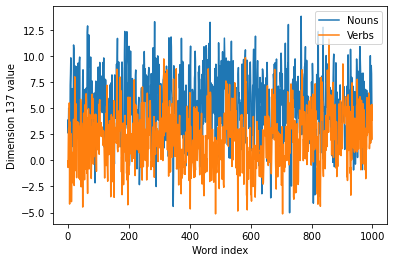

In [44]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '137'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '137'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 137 value')
plt.legend()

Indeed, generally nouns seem to have higher values in dimension `137` than verbs. Now we can have a look at the outliers. What are the verbs and nouns with highest and lowest values in this dimension. Potentially, verbs with higher values in it could be ambiguous with nouns or vice versa.

In [45]:
unique_freq_v_we.loc[:, '137'].sort_values()[-20:]

arrive       7.615453
veut         7.726127
écouter      7.776237
regardez     7.799977
monte        7.959327
voir         7.987017
sont         8.013703
parlent      8.334767
meurt        8.656360
parle        8.676083
tombent      8.686765
portés       8.724498
vus          8.745435
aimés        8.775960
regarder     8.784038
sortent      9.184559
jouent       9.247888
parlé        9.727236
sortira      9.852461
meurent     11.635337
Name: 137, dtype: float64

In [46]:
unique_freq_n_we.loc[:, '137'].sort_values()[:10]

con         -5.022720
or          -4.414763
études      -4.105182
seules      -3.594840
seuls       -3.493194
kilomètre   -3.305881
quart       -3.203944
ton         -2.508558
midi        -2.458294
long        -2.329259
Name: 137, dtype: float64

Interestingly, the verbs with a higher count in this dimension except `vus`, `aimés`, `porté` (and partially `parlé`) are not ambiguous, the verb `meurent` with highest value can't be interpreted as a noun or any other PoS.

For nouns, there are more ambiguous words at top `con` (can be an adjective), `or`, `seules`/`seuls`.

We can have a look at what verbs have the lowest values in the dimension and what nouns have the highest, assuming that these words should be non-ambiguously verbs and nouns:

In [47]:
unique_freq_v_we.loc[:, '137'].sort_values()[:10]

répondra     -5.134485
restons      -5.129943
attendant    -4.859307
comprenant   -4.748883
suivez       -4.656426
eus          -4.476579
posez        -4.403097
sauraient    -4.261603
poserait     -4.201146
fussent      -4.188415
Name: 137, dtype: float64

In [48]:
unique_freq_n_we.loc[:, '137'].sort_values()[-10:]

guerres       12.301328
odeur         12.332694
veste         12.359904
couleurs      12.362883
sueur         12.764534
guerre        12.891715
horreurs      13.026514
princesses    13.235813
lendemains    13.296439
parfum        13.818834
Name: 137, dtype: float64

Indeed, the verbs and nouns at the corresponding side of the spectrum are not ambiguous. However, it is interesting to notice that a the max side for both nouns and verbs there could be some lexical correlation `meurent` is the verb with highest value in the dimension and `guerre` appearing at the top of nouns, meaning that in addition to the PoS information the dimension could as well encode some lexical information.

### Dimension 159

Dimension `159` has the highest correlation with PoS and we can have a look if it appears to be correct. 

In [49]:
unique_freq_n_we.loc[:, '159'].describe()

count    1000.000000
mean       -3.379089
std         2.330565
min       -10.308782
25%        -4.973882
50%        -3.366699
75%        -1.810863
max         3.860630
Name: 159, dtype: float64

In [50]:
unique_freq_v_we.loc[:, '159'].describe()

count    1000.000000
mean       -0.306346
std         1.890440
min        -5.856759
25%        -1.616917
50%        -0.354389
75%         0.843539
max         6.975687
Name: 159, dtype: float64

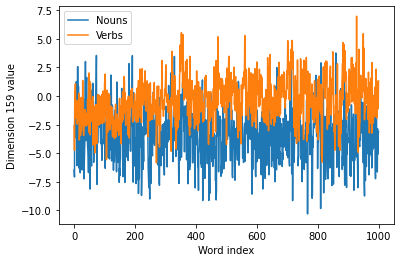

In [51]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '159'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '159'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 159 value')
plt.legend()

Here, the values of the dimension for verbs seem to be around 0, and values for nouns seem to be lower on general. We can also see that only 7% of nouns have a positive value in this dimension:

In [52]:
np.sum(np.array(unique_freq_n_we.loc[:, '159']) >= 0)/len(unique_freq_n_we.loc[:, '159'])

0.068

In comparison, 40% of verbs have a positive value in this dimension:

In [53]:
np.sum(np.array(unique_freq_v_we.loc[:, '159']) >= 0)/len(unique_freq_v_we.loc[:, '159'])

0.42

We can have a look at the outliers:

In [54]:
unique_freq_v_we.loc[:, '159'].sort_values()[:20]

dues         -5.856759
retrouvé     -5.783679
dises        -5.557819
retrouvés    -5.225046
fais         -4.969552
ries         -4.915228
parlée       -4.828527
seras        -4.758932
meurs        -4.740520
perdus       -4.735430
mettes       -4.628924
dus          -4.457342
retrouvées   -4.455048
perdues      -4.381512
feras        -4.272197
penses       -4.230485
tiennes      -4.230162
pourrons     -4.184775
sentirez     -4.182521
ferez        -4.173402
Name: 159, dtype: float64

We can potentially attribute these low values in verbs for several factors:
- The verbs being transitive => `Tu le feras` and `le feras` being interpretted as a noun
- `perdus`/`perdues` which can be used as a noun: `les perdus/perdues`
- `les tiennes` being a possesive pronoun

In [55]:
unique_freq_n_we.loc[:, '159'].sort_values()[-20:]

carte           1.405075
quart           1.453817
soir            1.623893
dimanche        1.775624
ensemble        1.804850
face            1.836086
feuille         2.011260
quarts          2.036620
seule           2.492659
heure           2.500959
heures          2.567712
madame          2.829990
mademoiselle    2.902764
côté            3.017199
présences       3.464170
semaine         3.526647
instant         3.546476
rang            3.764726
numéros         3.842225
numéro          3.860630
Name: 159, dtype: float64

We can try to attribute the outlying high values of nouns to potential occurences of them without any article:
- Par numero(s) / par carte / par semaine
- à rang de / à côté de
- Madame and mademoiselle being used to adress someone without any article
- En face / en carte / en feuille
- à dimanche / à soir
- As well as ambiguous nouns `seule` (can be adjective) or `ensemble` (can be adverb)

In [56]:
unique_freq_v_we.loc[:, '159'].sort_values()[-20:]

parlaient      3.910728
regardais      3.951928
écrivent       3.968062
riant          4.080727
appela         4.091023
écoutent       4.192473
regardent      4.249136
regarda        4.327001
regardé        4.460762
écrivait       4.534419
écrivit        4.675721
appelez        4.726689
répondait      4.842369
appeler        4.865578
aimeriez       5.182109
attendez       5.290317
regardaient    5.372563
écoutait       5.458646
regardait      5.537718
lisait         6.975687
Name: 159, dtype: float64

In [57]:
unique_freq_n_we.loc[:, '159'].sort_values()[:20]

parfum       -10.308782
lait          -9.839472
douceurs      -9.147656
vin           -9.138720
pains         -9.129437
princesse     -9.089209
bonheur       -9.004986
fruits        -8.943031
vache         -8.744326
chevaux       -8.696256
fruit         -8.673889
bains         -8.579679
chien         -8.524145
pain          -8.521943
salut         -8.464986
princesses    -8.264921
fers          -8.241133
danger        -8.235919
coeurs        -8.136814
cuir          -8.132087
Name: 159, dtype: float64

We can see transitive verbs again in the list of verbs with highest values (potentially the verbs that shouldn't be confused with nouns). However, we can notice that some forms of the verbs are more rare: passé simple, which may mean that the transitive examples were not present in the corpus.

We can still test the hypothesis of the correlation of this dimension values to transitivity of verbs later.

However, the theory of outlier nouns being there due to them frequently used without articles doesn't seem to hold: a lot of nouns with minimal values are frequently used without articles as well:
- à droit
- en cuir
- au lait / au vin / au pain

Hence, it is probablu unlikely that the values of this dimension correspond to the co-occurence of a word with articles.

### Dimension 168

In [58]:
unique_freq_n_we.loc[:, '168'].describe()

count    1000.000000
mean       -4.520624
std         2.908455
min       -13.535763
25%        -6.461178
50%        -4.543437
75%        -2.570709
max         4.759557
Name: 168, dtype: float64

In [59]:
unique_freq_v_we.loc[:, '168'].describe()

count    1000.000000
mean       -1.358698
std         2.788845
min       -11.168934
25%        -3.098112
50%        -1.095793
75%         0.610631
max         7.113431
Name: 168, dtype: float64

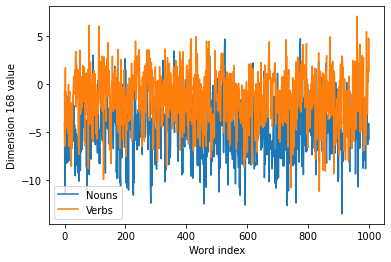

In [60]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '168'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '168'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 168 value')
plt.legend()

Similarly to the dimension above, the nouns seem to have lower values in this dimension, however, the deviation for this dimension's value is higher. Let's have a look at the outliers:

In [61]:
unique_freq_v_we.loc[:, '168'].sort_values()[:20]

montés        -11.168934
cherchez      -10.814021
ailles         -9.924334
cherchons      -9.687685
écrivant       -9.320558
meurs          -9.057507
assis          -8.985550
ferons         -8.778835
monté          -8.751593
comprenant     -8.632848
sois           -8.556838
mettes         -8.549283
devenant       -8.308197
pouvant        -8.250510
passez         -8.061159
ries           -8.001823
marchant       -7.903432
posant         -7.841803
devenez        -7.806858
comprennent    -7.770279
Name: 168, dtype: float64

In [62]:
unique_freq_n_we.loc[:, '168'].sort_values()[-20:]

effets          1.482846
anglaise        1.630561
âges            1.880424
conditions      1.880828
allemands       1.995543
attentes        2.010736
douleurs        2.165696
circonstance    2.202451
habitude        2.232567
anglaises       2.239074
maladie         2.349483
chances         2.494717
maux            2.670144
hiver           2.980102
raison          3.061120
exemple         3.471834
allemand        3.602129
preuve          4.202583
allemande       4.729955
preuves         4.759557
Name: 168, dtype: float64

And if we look highest vlaues for verbs and lowest for nouns:

In [63]:
unique_freq_v_we.loc[:, '168'].sort_values()[-20:]

commençaient    4.156486
essayé          4.191116
essayais        4.200020
finissait       4.271875
pourrions       4.352394
croyaient       4.362838
portait         4.459304
aimerait        4.492030
aimeraient      4.512638
venait          4.517740
arrêtera        4.651471
croyait         4.754494
appris          4.839269
perdait         4.956377
pensaient       4.975551
allaient        5.047371
apprenait       5.496291
allait          6.066159
faite           6.170630
essayait        7.113431
Name: 168, dtype: float64

In [64]:
unique_freq_n_we.loc[:, '168'].sort_values()[:20]

rayon       -13.535763
immeuble    -12.671767
vacance     -12.612188
fauteuil    -12.502253
bureau      -12.409613
bancs       -12.386861
lits        -11.638282
métier      -11.586425
café        -11.579555
parole      -11.419964
homme       -11.279187
photo       -11.239471
cul         -11.120661
immeubles   -11.075631
jardin      -11.050344
mecs        -10.835397
peaux       -10.811297
métiers     -10.767248
bureaux     -10.754667
salon       -10.748945
Name: 168, dtype: float64

We can see for verbs a higher concentration of verbs in passe imparfait, which potentially can link the dimension to a verb tense.

### Dimension 198

Description of dimension 198 for nouns:

In [65]:
unique_freq_n_we.loc[:, '198'].describe()

count    1000.000000
mean        3.929251
std         2.850418
min        -3.506686
25%         1.982223
50%         3.947078
75%         5.795587
max        13.864323
Name: 198, dtype: float64

Description of dimension 198 for verbs:

In [66]:
unique_freq_v_we.loc[:, '198'].describe()

count    1000.000000
mean        0.249723
std         2.934828
min        -6.979696
25%        -1.927692
50%         0.113929
75%         2.175815
max        10.105935
Name: 198, dtype: float64

This is the second dimension which could potentially be corresponding to PoS information where mean of verb dimension values is close to 0. 

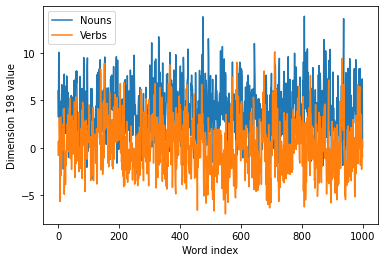

In [67]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '198'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '198'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 198 value')
plt.legend()

Outliers:

In [68]:
unique_freq_v_we.loc[:, '198'].sort_values()[-20:]

aimerions     6.691831
parlée        6.750360
demandera     6.771740
demandées     6.771949
sue           6.775420
veuillez      6.869750
demandés      6.961248
écrivez       7.132521
comprises     7.142180
connue        7.482978
pouvons       7.500731
posée         7.628286
portez        8.092013
pourriez      8.303205
demandez      8.759162
pouvant       8.897729
comprise      9.013088
lue           9.406178
appelées      9.925882
appelée      10.105935
Name: 198, dtype: float64

In [69]:
unique_freq_n_we.loc[:, '198'].sort_values()[:20]

cadavres    -3.506686
violences   -3.403962
suite       -3.291219
arrêts      -3.217397
son         -2.844270
chiennes    -2.787410
prison      -2.786444
retours     -2.670875
flics       -2.500388
juives      -2.421971
juifs       -2.372765
trottoirs   -2.358661
bains       -2.338661
flic        -2.336440
décisions   -2.266979
coup        -2.251112
ville       -2.150387
raisons     -2.059132
boues       -2.000461
poil        -1.974905
Name: 198, dtype: float64

### Dimension 212

Description of dimension `212` for nouns:

In [70]:
unique_freq_n_we.loc[:, '212'].describe()

count    1000.000000
mean       -2.723934
std         3.734640
min       -14.721822
25%        -5.276320
50%        -2.598370
75%        -0.121281
max         7.879390
Name: 212, dtype: float64

Description of dimension `212` for verbs: 

In [71]:
unique_freq_v_we.loc[:, '212'].describe()

count    1000.000000
mean        0.679370
std         2.997350
min       -10.970503
25%        -1.178830
50%         0.824814
75%         2.725950
max         9.193401
Name: 212, dtype: float64

Once again we can see that the values of the dimension for verbs are close to 0.

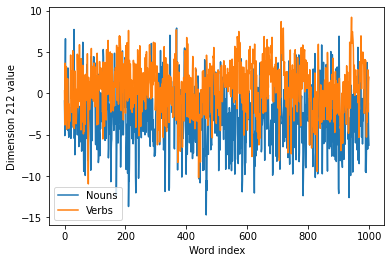

In [72]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '212'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '212'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 212 value')
plt.legend()

Outliers for verbs:

In [73]:
unique_freq_v_we.loc[:, '212'].sort_values()[:20]

ferons        -10.970503
pensé         -10.215091
posez          -9.451386
trouveras      -8.364132
laissons       -8.327107
répondra       -8.155667
devenez        -7.658653
cherchons      -7.328263
vivez          -7.216456
trouvez        -7.024298
jouez          -6.940198
retrouverez    -6.631535
trouverez      -6.532736
ouvres         -6.252396
passez         -6.245557
retrouvez      -6.244762
jouée          -6.055596
devenant       -5.915195
passerait      -5.890176
vas            -5.531349
Name: 212, dtype: float64

And what verbs have maximum values:

In [74]:
unique_freq_v_we.loc[:, '212'].sort_values()[-20:]

partaient     6.496856
connue        6.605228
suivies       6.738927
portent       6.764989
connus        6.851872
reviennent    6.855385
quittait      6.882961
su            6.886478
sachent       6.938191
retournent    6.941523
quitté        7.135792
quittant      7.456779
connues       7.471620
quitter       7.481288
voulues       7.594850
demandés      7.662197
appelées      7.765058
appellent     7.889357
appelée       8.669662
quittent      9.193401
Name: 212, dtype: float64

Outliers for nouns:

In [75]:
unique_freq_n_we.loc[:, '212'].sort_values()[-20:]

âge           4.837571
noires        4.963596
grâces        5.043547
ors           5.102256
semaines      5.117509
époque        5.167741
besoin        5.290983
noire         5.293870
noirs         5.474766
sexes         5.553098
bien          5.785156
terme         5.840644
lendemains    6.016439
années        6.165781
jour          6.591836
bleus         6.901220
or            7.014434
an            7.713143
haut          7.745336
hauts         7.879390
Name: 212, dtype: float64

Nouns with minimum values for dimension 212:

In [76]:
unique_freq_n_we.loc[:, '212'].sort_values()[:20]

salon        -14.721822
jardin       -13.704778
lectures     -12.625416
miroirs      -12.397629
salle        -12.340772
dessins      -12.129270
mariage      -12.070496
jeux         -12.052278
bain         -11.923830
boîte        -11.883881
princesses   -11.761798
chat         -11.742015
dessin       -11.556150
chats        -11.466392
pain         -10.840712
verre        -10.700480
chien        -10.694140
chienne      -10.648285
bains        -10.554235
princesse    -10.549297
Name: 212, dtype: float64

### Dimension 480

Description of values of dimension 480 for nouns:

In [77]:
unique_freq_n_we.loc[:, '480'].describe()

count    1000.000000
mean        1.899111
std         2.647454
min        -8.640285
25%         0.127820
50%         1.936551
75%         3.675743
max         9.576292
Name: 480, dtype: float64

For verbs:

In [78]:
unique_freq_v_we.loc[:, '480'].describe()

count    1000.000000
mean       -1.480390
std         2.130485
min        -7.979960
25%        -2.972722
50%        -1.505342
75%        -0.083268
max         5.370016
Name: 480, dtype: float64

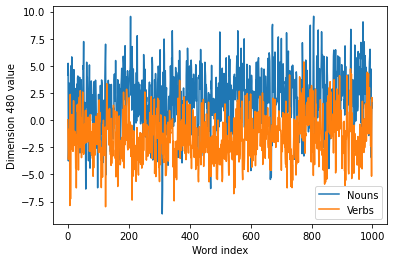

In [79]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '480'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '480'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 480 value')
plt.legend()

Let's have a look at the outliers (nouns with lowest value of the dimension and verbs with the highest):

In [80]:
unique_freq_n_we.loc[:, '480'].sort_values()[:20]

présents        -8.640285
présent         -6.480861
nom             -6.347413
dimanches       -6.303494
nouveau         -6.232853
seule           -5.462959
seuls           -5.292027
seul            -5.179367
vent            -5.044795
lieu            -5.034687
dimanche        -4.872899
suite           -4.664353
voisines        -4.648246
circonstances   -4.456377
instant         -4.421569
présences       -4.157806
seules          -4.125321
vents           -3.956634
hasard          -3.939171
famille         -3.904175
Name: 480, dtype: float64

In [81]:
unique_freq_v_we.loc[:, '480'].sort_values()[-20:]

retrouvées    2.859719
écrivit       2.879265
lu            2.888344
tombera       2.909136
meurent       2.974345
oubliez       2.993747
finira        3.191820
ailles        3.359642
tirez         3.545007
demandés      3.674566
perdez        3.726598
parus         3.993899
écrira        4.099756
jetez         4.102099
arrêtez       4.166961
lue           4.244391
oubliés       4.295964
oubliée       4.418562
lus           4.729566
levez         5.370016
Name: 480, dtype: float64

None of the outliers could be really wrongly interpretted as another PoS on a glance.

### Dimension 51

Values of dimension 51 for nouns:

In [82]:
unique_freq_n_we.loc[:, '51'].describe()

count    1000.000000
mean        3.822164
std         2.479641
min        -4.880090
25%         2.167264
50%         3.894065
75%         5.488648
max        10.893773
Name: 51, dtype: float64

For verbs:

In [83]:
unique_freq_v_we.loc[:, '51'].describe()

count    1000.000000
mean        0.819601
std         2.447991
min        -5.915279
25%        -0.933508
50%         0.769309
75%         2.350447
max        10.593857
Name: 51, dtype: float64

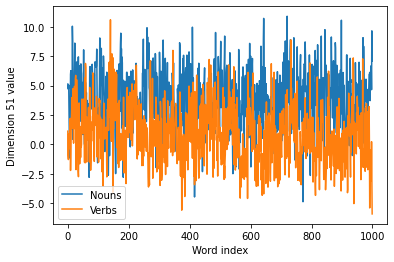

In [84]:
plt.plot(range(len(unique_freq_n_we)), unique_freq_n_we.loc[:, '51'], label='Nouns')
plt.plot(range(len(unique_freq_n_we)), unique_freq_v_we.loc[:, '51'][:len(unique_freq_n_we)], label='Verbs')
plt.xlabel('Word index')
plt.ylabel('Dimension 51 value')
plt.legend()

Outliers:

In [85]:
unique_freq_n_we.loc[:, '51'].sort_values()[:20]

contact     -4.880090
ennemies    -4.473399
ville       -2.803459
papier      -2.798269
paupières   -2.643359
doigts      -2.628122
ennemie     -2.504863
cousins     -2.493898
lèvres      -2.488328
pains       -2.317813
dernières   -2.110674
ton         -1.978012
voisines    -1.919840
truc        -1.916490
ports       -1.817926
cousine     -1.785795
rayon       -1.765585
paupière    -1.756715
nouveau     -1.571904
seins       -1.341382
Name: 51, dtype: float64

In [86]:
unique_freq_v_we.loc[:, '51'].sort_values()[-20:]

peuvent       6.411231
ayons         6.546403
sentons       6.596038
voulons       6.736224
aimer         6.748180
entendons     6.753186
parte         6.857549
ayez          6.880438
finis         6.922651
puissions     6.977132
peux          6.988788
devrions      7.117481
aimons        7.215671
essayons      7.270628
rions         7.348440
peut          7.351294
puissiez      7.694643
mettons       7.991395
vivons        8.884030
pouvons      10.593857
Name: 51, dtype: float64

# Results



We can now perform a test by adding more PoS: adjectives, adverbs and seeing whether or not any of the dimensions remain strongly correlated to the PoS information.

# Adding adjectives and adverbs

In [88]:
top_freq_adj = pd.read_csv('Most Frequent Words/top_frequent_ADJ.csv', index_col=0)[:1000]

In [89]:
top_freq_adj['cgram'] = 'ADJ'
top_freq_adj

,lemme,cgram,freqlemlivres
Word,,,
son,son,ADJ,4696.15
sa,sa,ADJ,3732.43
tous,tout,ADJ,3171.35
tout,tout,ADJ,3171.35
tout,tout,ADJ,3171.35
...,...,...,...
assise,assis,ADJ,30.27
assises,assis,ADJ,30.27
indifférent,indifférent,ADJ,30.14


In [90]:
from we import *

model, tokenizer, log = initiate_model()

/Users/egoliakova/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Some weights of the model checkpoint at flaubert/flaubert_small_cased were not used when initializing FlaubertModel: ['pred_layer.proj.weight', 'pred_layer.proj.bias']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [91]:
adj_we = create_words_df(model, tokenizer, top_freq_adj[~top_freq_adj.index.isin(top_freq_n.index)].index)
adj_we

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
son,-1.371765,0.023384,-3.223059,-0.128716,1.743437,-5.050135,-2.566689,3.898434,2.324070,0.461080,...,-0.468684,-1.159611,0.185187,0.692381,-4.912082,-4.680734,-2.378969,-3.832992,-0.688006,-4.490879
sa,0.141941,1.930712,-3.402721,0.568273,0.315616,-4.563599,1.713092,3.325673,2.165891,1.284356,...,1.424293,-0.093632,-2.196225,-0.636604,-2.686444,-5.478354,-3.203217,-3.358541,1.449512,-6.741152
tous,1.129453,-4.255967,-0.410349,0.146414,3.576469,4.121017,0.134399,-2.209909,-1.514493,-0.690314,...,-0.823049,-3.983184,0.169350,-4.874427,2.614017,-3.662928,1.788742,-6.000022,-5.539269,-1.524175
toute,0.228007,-2.501421,0.797278,-6.389000,2.913804,1.568916,-4.957053,-2.731148,0.924702,1.271600,...,0.988187,0.649038,-1.996603,-3.299839,0.436457,-4.999957,-0.832127,-6.148788,-2.115986,-3.829260
toutes,1.389389,-3.404379,-1.706235,-1.811354,5.196568,3.528240,-3.168396,-3.312800,-0.271935,-1.351587,...,-0.057005,-1.179087,0.969326,-4.047242,2.138844,-4.193913,1.092826,-4.633731,-3.549718,0.867384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
assis,4.227304,-1.873211,1.711697,5.450985,-3.140384,-5.332380,2.003428,4.049249,4.066420,-1.730631,...,-5.446676,-3.099241,-4.944200,-2.090297,-2.101048,-2.265973,-1.439263,-3.113337,-3.248899,-4.093177
assise,6.605255,-3.188693,2.408048,-0.240419,1.644310,-6.952302,-4.144585,3.931452,5.756548,-0.215943,...,-3.587319,3.941912,-4.589899,-5.223729,-1.282132,-6.292689,-1.850765,0.482848,0.276403,-8.054886
assises,5.590267,-3.436942,2.810249,-4.377880,1.684232,-7.888458,-2.352491,0.879242,2.562158,3.040972,...,-5.217717,0.985175,-3.590964,-2.811068,-2.729495,-6.910168,-3.678877,1.014451,-1.778919,-4.747766
indifférent,2.131292,-0.417926,-0.228345,0.286183,3.341225,-3.808870,-1.897214,3.034866,3.643936,1.819136,...,-4.606998,-1.038017,-1.399645,-3.527106,-3.456003,-1.021520,-3.280523,-3.956781,5.061137,-2.010664


In [92]:
unique_freq_adj_we = adj_we.merge(top_freq_adj, left_index=True, right_index=True)
unique_freq_adj_we.columns = list(map(lambda x: str(x), unique_freq_adj_we.columns))
unique_freq_adj_we

,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,lemme,cgram,freqlemlivres
absolu,4.933391,-1.820655,1.532478,-1.979795,1.728292,0.517361,-2.229984,4.105628,-2.711453,1.507046,...,1.752741,-0.999988,-3.802394,-0.709234,-3.994629,1.213610,-1.900828,absolu,ADJ,34.39
absolue,4.234381,-0.431358,-0.230961,-0.056044,0.191299,0.593049,-3.839259,2.989963,-1.278115,-0.350125,...,3.248165,-0.003822,-2.327732,-1.106974,-3.103743,-0.077974,-2.705171,absolu,ADJ,34.39
absurde,3.756803,1.015494,0.616596,-1.308431,3.019945,4.145076,-0.925479,-0.032260,0.841586,5.597266,...,-3.673599,-0.109983,-0.612023,-4.347472,-1.936714,5.816693,4.032070,absurde,ADJ,30.95
absurdes,2.697266,0.319823,0.002797,-0.765813,1.198913,1.122232,-0.262583,0.897586,-1.270633,3.957298,...,-2.672605,-2.171850,-1.001583,-4.618104,-2.425415,5.932143,4.784193,absurde,ADJ,30.95
admirable,5.150778,-5.211925,5.518538,2.615006,6.667579,2.972428,-6.595057,1.552289,0.413112,2.634962,...,-2.022568,-1.432461,-3.422603,1.299158,-0.653873,0.795807,-4.245778,admirable,ADJ,31.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
étroits,3.637715,1.597038,5.080803,0.715606,-1.297797,-4.529139,-3.491086,-2.718746,3.092584,2.353549,...,-4.737136,3.492908,-0.856422,-2.255601,-0.500841,1.360816,-1.337827,étroit,ADJ,75.81
évident,2.340510,-0.332801,2.248723,0.235987,-0.756931,-2.655907,-4.716413,1.222106,-0.423593,0.004631,...,-4.120303,2.875386,-1.700507,-2.543783,-8.283433,2.971671,-6.232332,évident,ADJ,33.58
évidente,4.817487,-1.732906,4.693172,-1.503866,1.758747,-1.981044,-4.529288,1.008203,0.146850,-0.596633,...,-0.314816,2.094974,-2.281071,-1.359965,-6.485075,1.532511,-4.370127,évident,ADJ,33.58
évidentes,4.127913,-0.139260,3.736150,1.509428,-0.238838,-3.402861,-4.729940,1.938044,0.244337,-5.802176,...,-0.755126,0.868269,-1.814699,-1.389882,-7.313276,3.100853,-5.175048,évident,ADJ,33.58


We can add encoding of 'ADJ' as PoS as `pos = 2`:

In [93]:
unique_freq_adj_we['pos'] = 2

Now adding adverbs:

In [95]:
top_freq_adv = pd.read_csv('Most Frequent Words/top_frequent_ADV.csv', index_col=0)[:1000]

In [96]:
adv_we = create_words_df(model, tokenizer, top_freq_adv[~top_freq_adv.index.isin(top_freq_n.index)].index)
adv_we

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
n,-0.676710,3.449507,-1.735173,3.156701,-0.590798,-3.329250,-7.041614,0.364143,0.853162,5.121193,...,1.315812,-2.259668,-2.202268,-0.837009,-1.478259,3.317715,-0.347990,-1.692286,-0.049426,-1.379506
n',-3.097368,-1.079689,0.067284,-3.135941,0.706760,1.007909,-5.346002,1.035985,-2.897622,1.616330,...,0.778125,-2.123144,-1.224010,-3.846741,-2.123554,-4.506597,-2.959948,-2.108817,-0.951543,1.712145
ne,-2.281668,-1.370962,-0.403685,-0.073815,0.837571,-0.220982,-5.014138,0.451976,1.381517,2.327595,...,-2.500302,-2.513185,0.119819,-1.138245,-1.521283,-3.855268,-3.555737,-3.946141,2.373042,-0.525675
plus,-3.509048,-2.220096,1.762023,-0.791895,-2.215525,-1.303401,-1.088937,-0.509107,-2.603570,3.042406,...,1.016149,0.066032,-1.052608,-1.366760,-1.228347,-1.889529,-3.330955,-3.745218,-2.395585,2.763508
bien,-1.731442,0.859784,-2.307073,-5.163003,1.377131,-5.495888,-4.201455,4.921665,-1.770308,-1.760445,...,-5.705878,2.306156,0.607199,-4.857283,-0.061548,-1.715081,-1.097555,-9.387454,0.864542,-3.865713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
électriquement,8.631221,-3.871418,4.073094,-2.359468,-2.187433,1.437934,-4.311751,4.438055,4.719334,-1.852672,...,-3.972917,-2.165127,-1.363348,4.554272,1.618819,-4.006776,-1.494066,-5.174683,4.568310,-0.342058
épais,6.125545,-5.822879,5.330243,-2.898252,0.998407,-4.882508,-7.058368,-2.909385,3.399447,1.074606,...,-5.521036,0.449374,0.928466,-3.658157,0.430408,-1.635432,-3.150975,-5.027833,0.371530,-1.185125
jà,5.297632,-3.015820,-0.500489,2.371873,1.007881,-0.054421,-1.345942,-0.733034,-7.984251,-1.530580,...,-2.660295,2.614063,-0.094727,1.409462,-0.024955,-0.951452,1.071933,-5.745087,1.674073,-3.008836
post,1.562362,-1.066778,-2.478954,-3.414423,-0.828831,-0.633434,-2.639267,-1.668935,1.725153,0.329819,...,2.379458,1.137498,3.869631,-7.473512,0.944034,-3.988267,-4.131471,-1.907951,4.592034,1.847652


In [97]:
unique_freq_adv_we = adv_we.merge(top_freq_adv, left_index=True, right_index=True)
unique_freq_adv_we.columns = list(map(lambda x: str(x), unique_freq_adv_we.columns))

Now we can encode adverbs' PoS as `3`:

In [98]:
unique_freq_adv_we['pos'] = 3

Now we can combine all 4 PoS together in one DataFrame:

In [99]:
unique_nvaa_we = pd.concat([unique_freq_adj_we, unique_freq_adv_we, unique_freq_n_we, unique_freq_v_we])

In [100]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_nvaa_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
43,-0.271539,-1.0,0.271539
224,0.274529,1.0,0.274529
318,0.276381,1.0,0.276381
469,-0.277401,-1.0,0.277401
52,0.280523,1.0,0.280523
280,-0.282084,-1.0,0.282084
286,0.283527,1.0,0.283527
416,-0.289045,-1.0,0.289045
50,0.292767,1.0,0.292767
157,-0.295660,-1.0,0.295660


The correlation between PoS encoding and the dimensions is much less stronger if we compare all 4 PoS together. However, if we compare the results in triples we can see much closer correlated dimensions. First, comparing nouns, adjectives and verbs:

In [101]:
unique_nvadj_we = pd.concat([unique_freq_adj_we, unique_freq_n_we, unique_freq_v_we])

In [102]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_nvadj_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
199,0.318529,1.0,0.318529
240,0.318633,1.0,0.318633
479,-0.319168,-1.0,0.319168
419,0.322602,1.0,0.322602
461,0.325753,1.0,0.325753
45,-0.333802,-1.0,0.333802
434,-0.342895,-1.0,0.342895
318,0.346025,1.0,0.346025
310,-0.348157,-1.0,0.348157
282,0.355196,1.0,0.355196


Firs of all, previously seen dimension `480` appears again and a new dimension `89` emerges which can be hypothesized to encode more information about adjectives than other dimensions. 

Now we can compare nouns, adverbs and verbs:

In [103]:
unique_nvadv_we = pd.concat([unique_freq_adv_we, unique_freq_n_we, unique_freq_v_we])

In [104]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_nvadv_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
140,0.296388,1.0,0.296388
157,-0.297116,-1.0,0.297116
76,0.300062,1.0,0.300062
393,-0.304580,-1.0,0.304580
469,-0.306516,-1.0,0.306516
111,0.307858,1.0,0.307858
352,0.310250,1.0,0.310250
208,-0.310347,-1.0,0.310347
52,0.311635,1.0,0.311635
156,-0.313200,-1.0,0.313200


The correlation here is stronger but still much lower (and none of the previously studied dimensions appear again), this can be explained that adverbness and noun-ness are encoded in different dimensions.

Now if we compare adverbs, adjectives and verbs:

In [105]:
unique_vaa_we = pd.concat([unique_freq_adv_we, unique_freq_adj_we, unique_freq_v_we])

In [106]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_vaa_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
165,0.331658,1.0,0.331658
416,-0.332574,-1.0,0.332574
318,0.333639,1.0,0.333639
52,0.333881,1.0,0.333881
286,0.337302,1.0,0.337302
192,0.340028,1.0,0.340028
132,-0.341622,-1.0,0.341622
395,0.347098,1.0,0.347098
222,-0.348423,-1.0,0.348423
291,-0.352899,-1.0,0.352899


The correlations become stronger in comparison to nouns, however, are still weaker than Nouns vs Verbs. We can compare in general correlation of adverbs with other PoS in pairs, starting with verbs and adverbs:

In [107]:
unique_vadv_we = pd.concat([unique_freq_adv_we, unique_freq_v_we])

In [108]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_vadv_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
52,0.383618,1.0,0.383618
393,-0.384517,-1.0,0.384517
111,0.385844,1.0,0.385844
208,-0.390847,-1.0,0.390847
130,0.393343,1.0,0.393343
390,-0.394818,-1.0,0.394818
156,-0.396868,-1.0,0.396868
352,0.399198,1.0,0.399198
224,0.400225,1.0,0.400225
399,-0.401422,-1.0,0.401422


Now for adjectives and adverbs:

In [109]:
unique_aa_we = pd.concat([unique_freq_adj_we, unique_freq_adv_we])

In [110]:
pos_corr_freq_df = pd.DataFrame(columns=['corr_with_pos'])
pos_list = []

# Go through dimensions from 0 to 511
for i in range(512):
    # Find the correlation of the current column with "freqlemlivres" and add to the list
    pos_list.append(unique_aa_we.loc[:, [str(i), 'pos']].corr().iloc[0][-1])

# Use the list values as 
pos_corr_freq_df['corr_with_pos'] = pos_list
pos_corr_freq_df['sign'] = np.sign(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df['abs'] = abs(pos_corr_freq_df['corr_with_pos'])
pos_corr_freq_df.sort_values('abs')[-20:]

,corr_with_pos,sign,abs
12,-0.342790,-1.0,0.342790
198,-0.346036,-1.0,0.346036
255,0.348006,1.0,0.348006
137,-0.348032,-1.0,0.348032
175,0.350790,1.0,0.350790
67,-0.354005,-1.0,0.354005
111,0.354094,1.0,0.354094
119,-0.358525,-1.0,0.358525
99,-0.363582,-1.0,0.363582
63,0.368039,1.0,0.368039


Correlation with adjectives seems to be much weaker.

# Conclusion

We have found a list of dimensions correlated to Verb-Noun PoS information:  

We have found a group of dimension correlated with PoS information **for verbs and nouns**: '137', '159', '168', '198', '212', '310', '480', '51'. Dimension **159** seems to be the closest to represent Noun<->Verb PoS. However, none of the dimension seem to represent PoS information only: the outliers don't appear to be ambiguous words that can be attributed to multiple parts of speech but in general quite regular looking nouns/verbs.

Several points for further inverstigation:
- Since the PoS information doesn't seem to be directly corresponding to any of the dimension, we can assume that PoS is retrieved from co-occurence information: e.g. nouns co-occuring with articles, verbs co-occuring with pronouns like je/il/...
- We have observed that for several of the dimensions with the highest correlation to PoS information, mean for values of the dimension for verbs is relatively close to 0: 159, 212, 51, 198 which can be potentially interesting to investigate: the closeness of dimension values to 0 on average.
- Dimension `480` remained strongly correlated with PoS with adding **adjectives** into experiment, making it the prime candidat for encoding verb-ness, noun-ness and adjective-ness.
- Dimension `89` seems to be closest information related to PoS of Verbs and Adjectives and likely Adverbs which could explain the decrease in the correlation in the experiment with nouns.
- PoS information for nouns/adj and adverbs seems less correlated, meaning that there is less likely to be an axis embedding all PoS. In [this work](https://arxiv.org/pdf/1906.00114.pdf) it's shown that there is a PCA component representing the Verb/Noun axis and Noun/Adjective axis and this is confirmed by what we're seeing: the adverbs seem to be encoded in a way that is not direcly oppositional to nouns. 